# Installing Libraries

In [79]:
pip install pandas numpy matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2




#Pandas: Used for data manipulation.
#NumPy: Provides support for large, multi-dimensional arrays and matrices.
#Matplotlib and Seaborn: Used for data visualization.
#Scikit-learn: Provides tools for preprocessing and feature selection

# Load dataset

In [29]:
# Load the Titanic dataset
data = pd.read_csv(r'E:\titanic survival prediction.csv')

# Display the first few rows of the dataset
data.head()



#The dataset is loaded using Pandas’ read_csv function.
#data.head() gives a preview of the first few rows of the dataset.

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Exploratory Data Analysis (EDA)

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64


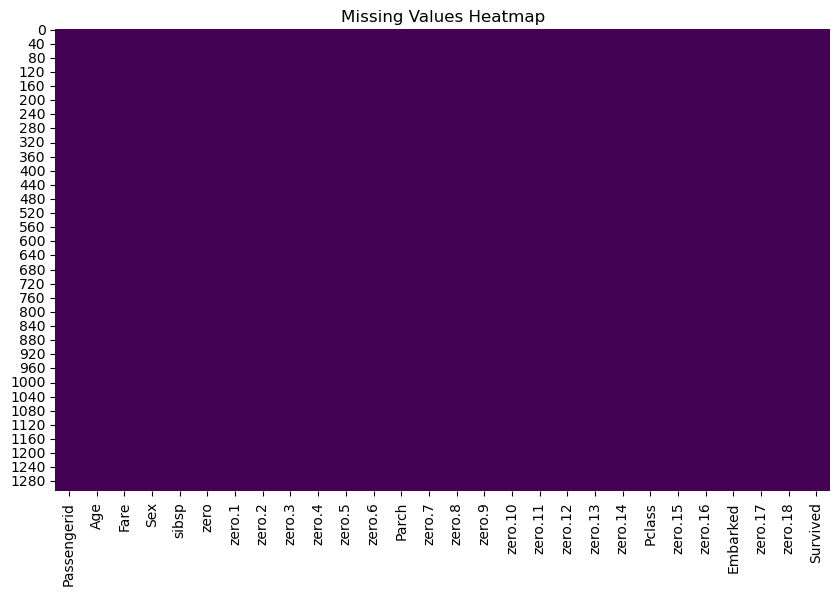

In [31]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()




#We check for missing values using isnull().sum().
# A heatmap visualizes the missing data, giving a quick overview of the missing values in the dataset.

# Handling Missing Data

In [37]:
# Fill missing 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


# Verify that missing data has been handled
print(data.isnull().sum())





#Missing Age values are filled with the median.
#Missing Embarked values are filled with the mode.
#The Cabin column is dropped due to a high number of missing values

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
Survived       0
dtype: int64


C:\Users\pradu\AppData\Local\Temp\ipykernel_16448\948247008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\pradu\AppData\Local\Temp\ipykernel_16448\948247008.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Data Transformation: Scaling Features

In [39]:
# Scaling the 'Age' and 'Fare' columns
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])




#The Age and Fare features are scaled using StandardScaler.


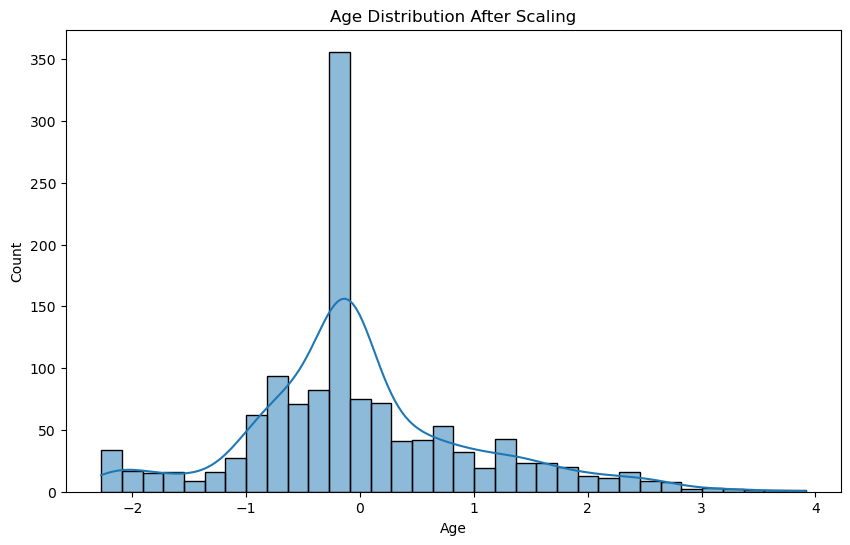

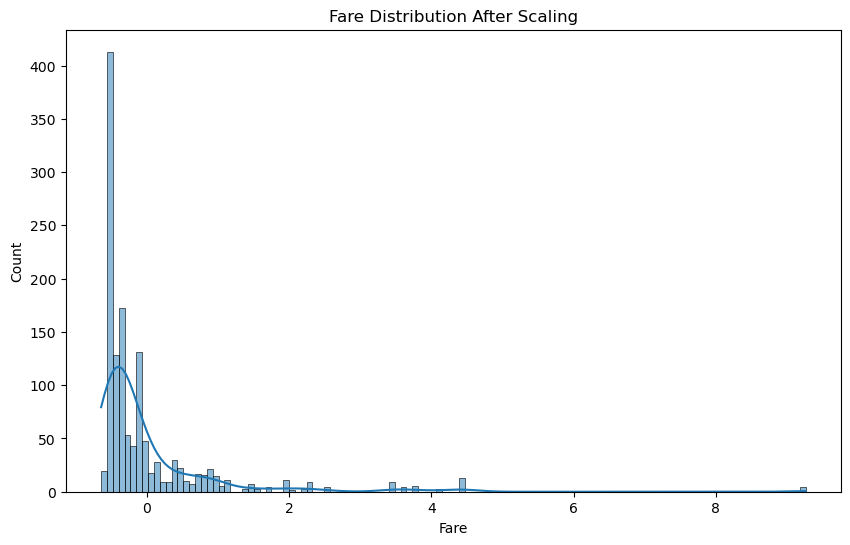

In [41]:
# Visualizing the distribution after scaling
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution After Scaling')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution After Scaling')
plt.show()



#Histograms show the distribution of Age and Fare after scaling.


# Encoding Categorical Variables

In [43]:
# Label encoding for 'Sex'
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# One-Hot encoding for 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Displaying the first few rows of the modified dataset
data.head()




#The Sex column is label-encoded (0 for female, 1 for male).
#The Embarked column is one-hot encoded to create binary features.

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,Survived,Embarked_1.0,Embarked_2.0
0,1,-0.581628,-0.503291,0,1,0,0,0,0,0,...,0,0,3,0,0,0,0,0,False,True
1,2,0.658652,0.734744,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,False
2,3,-0.271558,-0.490240,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,1,False,True
3,4,0.426099,0.383183,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,True
4,5,0.426099,-0.487824,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,False,True


# Feature Engineering


In [49]:
# Creating a new feature 'FamilySize'
data['FamilySize'] = data['sibsp'] + data['Parch'] + 1

# Dropping redundant columns
data.drop(['sibsp', 'Parch'], axis=1, inplace=True)

# Displaying the first few rows after feature engineering
data.head()



# A new feature FamilySize is created by combining SibSp (siblings/spouses aboard) and Parch (parents/children aboard).
# Redundant columns are dropped for a cleaner dataset.

,Passengerid,Age,Fare,Sex,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,Survived,Embarked_1.0,Embarked_2.0,FamilySize
0,1,-0.581628,-0.503291,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,False,True,2
1,2,0.658652,0.734744,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,False,False,2
2,3,-0.271558,-0.490240,1,0,0,0,0,0,0,...,0,3,0,0,0,0,1,False,True,1
3,4,0.426099,0.383183,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,False,True,2
4,5,0.426099,-0.487824,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,False,True,1


# Feature Selection

In [55]:
# Adding a constant value to make all features non-negative
X = X - X.min().min()  # This shifts all feature values to be non-negative

# Proceed with SelectKBest using chi2
select_k_best = SelectKBest(chi2, k=5)
X_best = select_k_best.fit_transform(X, y)

# Getting the selected feature names
selected_features = X.columns[select_k_best.get_support()]
print('Selected Features:', selected_features)




#The top 5 features are selected using SelectKBest with the Chi-Square (chi2) statistical test.
#The selected features are printed for verification.

Selected Features: Index(['Passengerid', 'Age', 'Fare', 'Sex', 'Pclass'], dtype='object')


# Bar Chart Visualization

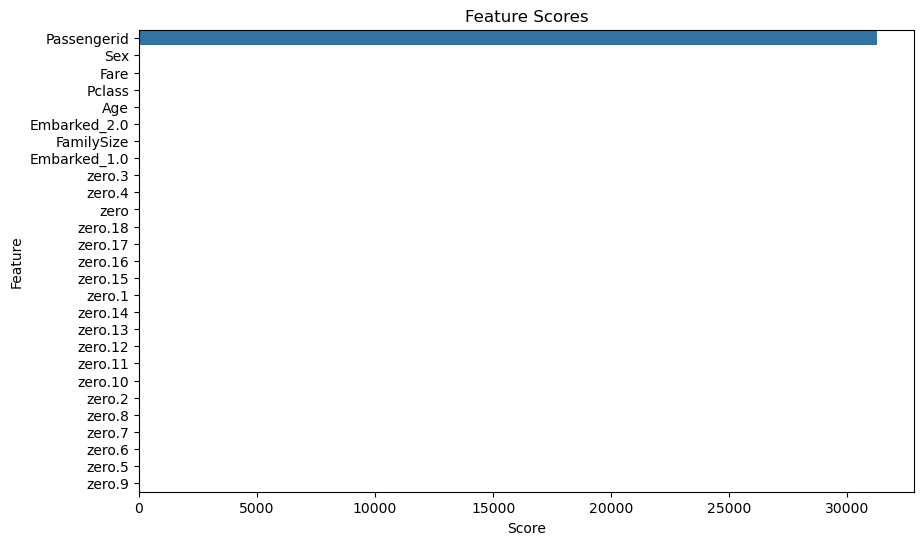

In [57]:
# Visualizing the selected features with a bar chart
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': select_k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores')
plt.show()




#A bar chart visualizes the scores of the selected features.


# Line Chart Visualization

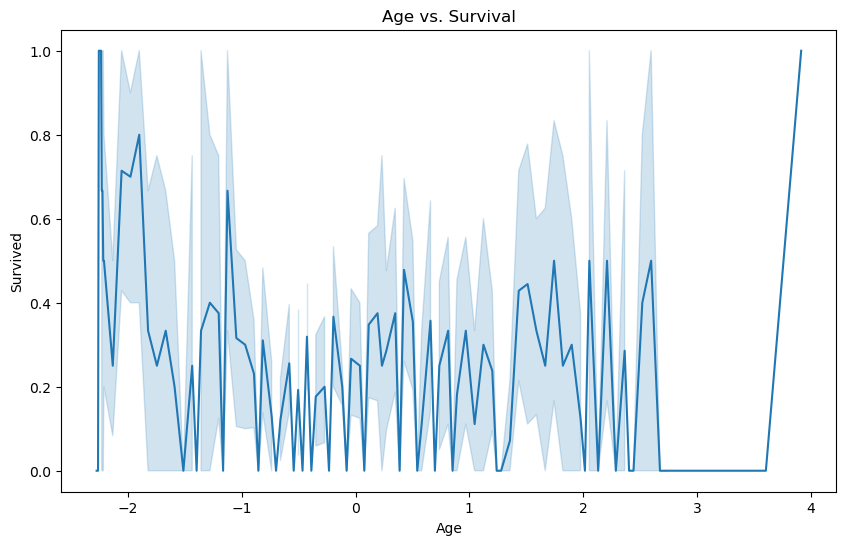

In [59]:
# Visualizing the relationship between Age and Survival with a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Survived', data=data)
plt.title('Age vs. Survival')
plt.show()




#A line chart shows the relationship between Age and survival rate.


# Histogram Visualization

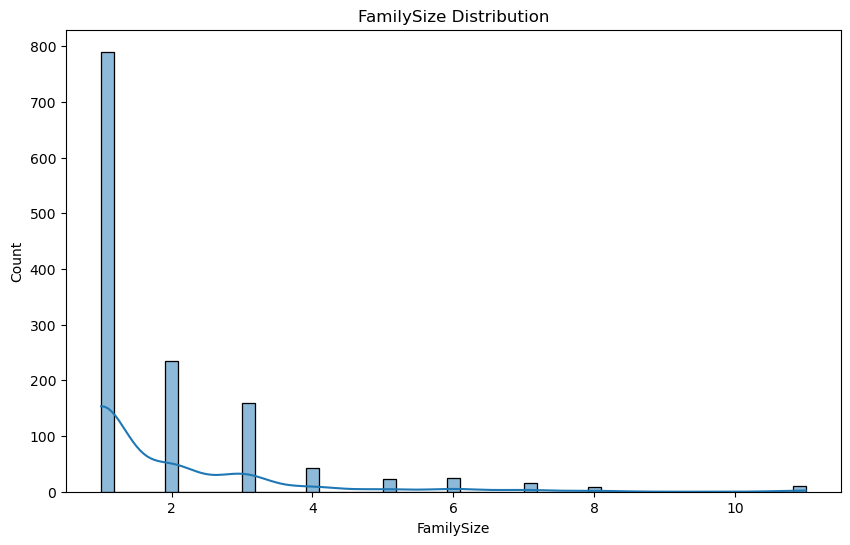

In [61]:
# Visualizing the distribution of FamilySize
plt.figure(figsize=(10, 6))
sns.histplot(data['FamilySize'], kde=True)
plt.title('FamilySize Distribution')
plt.show()




#A histogram visualizes the distribution of the FamilySize feature.


# Radar Chart Visualization

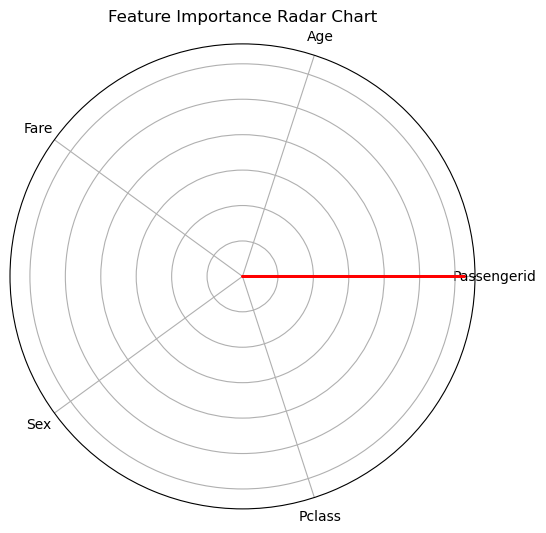

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Sample data and feature selection
# X, y should be defined as per your dataset
# select_k_best = SelectKBest(f_classif, k=5)
# X_best = select_k_best.fit_transform(X, y)
# selected_features = X.columns[select_k_best.get_support()]

# Assuming selected_features and the scores are already obtained
selected_features = X.columns[select_k_best.get_support()]
scores = select_k_best.scores_[select_k_best.get_support()]

# Preparing data for radar chart
labels = selected_features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

scores = list(scores)  # Convert scores to list for easy manipulation
scores += scores[:1]  # Complete the loop

# Plotting the radar chart
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='red', alpha=0.25)
ax.plot(angles, scores, color='red', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Feature Importance Radar Chart')
plt.show()




#A radar chart visualizes the importance of the selected features.


# Map Visualization

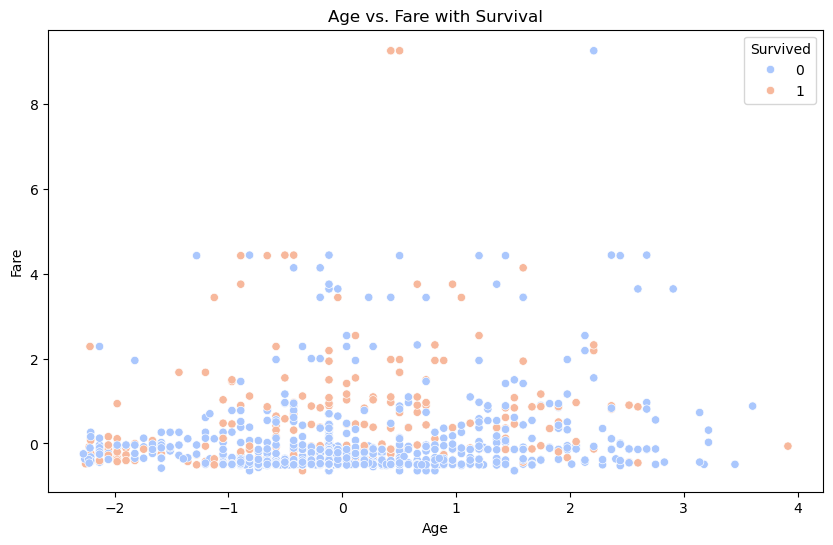

In [71]:
# Map visualization of survival rate by age and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs. Fare with Survival')
plt.show()



#A scatter plot visualizes the survival rate based on Age and Fare.


# Heatmap Visualization

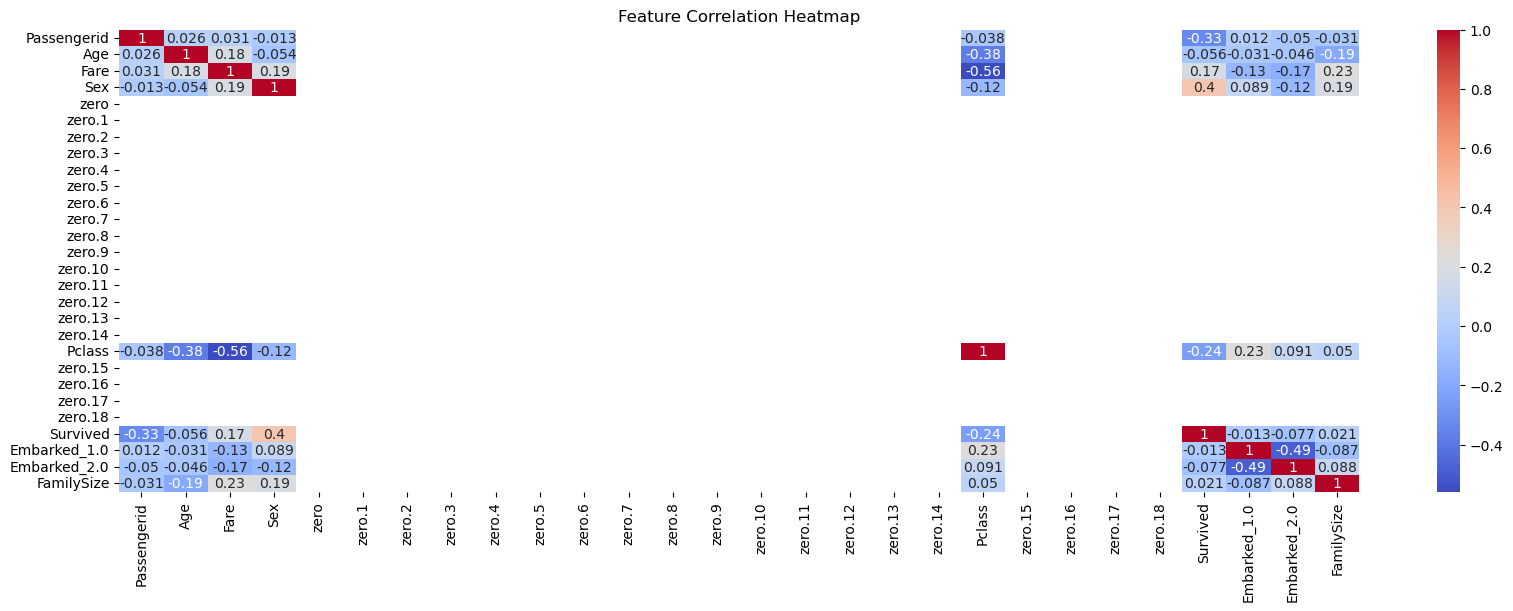

In [112]:
# Correlation heatmap of the dataset
plt.figure(figsize=(20, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



#A heatmap shows the correlation between different features in the dataset.


# Pie Chart Visualization

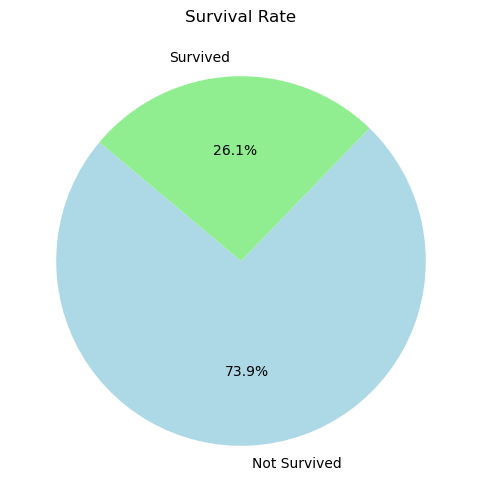

In [75]:
# Pie chart of survival rate
survival_rate = data['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survival_rate, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Survival Rate')
plt.show()
